In [8]:
import numpy as np
import pandas as pd
path = 'https://raw.githubusercontent.com/sumathi16/ML_FDP_SVEC/master/'
fileName1 = 'student_marks.csv'
fileName2 = 'student_data.csv'
student_marks_df = pd.read_csv(path+fileName1)
student_data_df = pd.read_csv(path+fileName2)
num_cols = student_marks_df.columns[student_marks_df.dtypes != object]
for col in num_cols:
    m = student_marks_df[col].mean()
    student_marks_df[col] = student_marks_df[col].fillna(m)    

In [11]:
student_marks_df

,Roll Number,Name,English,Maths,Science
0,423,Raj,45.00,89.0,92
1,545,Ram,60.25,78.0,90
2,377,Ravi,65.00,59.0,77
3,510,Lokesh,67.00,32.0,44
4,602,Roja,64.00,37.0,76


In [12]:
student_data_df

,Roll Number,College,Branch
0,510,SVCE,ECE
1,602,SVEC,IT
2,423,SVECW,MECH
3,545,SVU,IT
4,377,SVEC,IT


In [13]:
student_data_df.dtypes

Roll Number     int64
College        object
Branch         object
dtype: object

In [14]:
student_data_df.describe(include=object)

,College,Branch
count,5,5
unique,4,3
top,SVEC,IT
freq,2,3


In [15]:
student_data_df.nunique()

Roll Number    5
College        4
Branch         3
dtype: int64

In [16]:
student_data_df.College.value_counts()

SVEC     2
SVCE     1
SVECW    1
SVU      1
Name: College, dtype: int64

In [17]:
student_data_df.Branch.value_counts()

IT      3
MECH    1
ECE     1
Name: Branch, dtype: int64

In [19]:
student_marks_df['Total']=student_marks_df['Maths']+\
    student_marks_df['English'] + student_marks_df['Science']
student_marks_df

,Roll Number,Name,English,Maths,Science,Total
0,423,Raj,45.00,89.0,92,226.00
1,545,Ram,60.25,78.0,90,228.25
2,377,Ravi,65.00,59.0,77,201.00
3,510,Lokesh,67.00,32.0,44,143.00
4,602,Roja,64.00,37.0,76,177.00


In [20]:
pd.merge(student_marks_df,student_data_df,\
        on = 'Roll Number')

,Roll Number,Name,English,Maths,Science,Total,College,Branch
0,423,Raj,45.00,89.0,92,226.00,SVECW,MECH
1,545,Ram,60.25,78.0,90,228.25,SVU,IT
2,377,Ravi,65.00,59.0,77,201.00,SVEC,IT
3,510,Lokesh,67.00,32.0,44,143.00,SVCE,ECE
4,602,Roja,64.00,37.0,76,177.00,SVEC,IT


In [22]:
student_marks_df['Roll Number'][4] = 502

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
student_marks_df

,Roll Number,Name,English,Maths,Science,Total
0,423,Raj,45.00,89.0,92,226.00
1,545,Ram,60.25,78.0,90,228.25
2,377,Ravi,65.00,59.0,77,201.00
3,510,Lokesh,67.00,32.0,44,143.00
4,502,Roja,64.00,37.0,76,177.00


In [24]:
pd.merge(student_marks_df,student_data_df,\
        on = 'Roll Number')

,Roll Number,Name,English,Maths,Science,Total,College,Branch
0,423,Raj,45.00,89.0,92,226.00,SVECW,MECH
1,545,Ram,60.25,78.0,90,228.25,SVU,IT
2,377,Ravi,65.00,59.0,77,201.00,SVEC,IT
3,510,Lokesh,67.00,32.0,44,143.00,SVCE,ECE


In [25]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key order
        * outer: use union of keys from both frames, similar to a SQL full outer
          join;

In [26]:
pd.merge(student_marks_df,student_data_df,\
        how='left',on = 'Roll Number',)

,Roll Number,Name,English,Maths,Science,Total,College,Branch
0,423,Raj,45.00,89.0,92,226.00,SVECW,MECH
1,545,Ram,60.25,78.0,90,228.25,SVU,IT
2,377,Ravi,65.00,59.0,77,201.00,SVEC,IT
3,510,Lokesh,67.00,32.0,44,143.00,SVCE,ECE
4,502,Roja,64.00,37.0,76,177.00,NaN,NaN


In [27]:
pd.merge(student_marks_df,student_data_df,\
        how='right',on = 'Roll Number',)

,Roll Number,Name,English,Maths,Science,Total,College,Branch
0,423,Raj,45.00,89.0,92.0,226.00,SVECW,MECH
1,545,Ram,60.25,78.0,90.0,228.25,SVU,IT
2,377,Ravi,65.00,59.0,77.0,201.00,SVEC,IT
3,510,Lokesh,67.00,32.0,44.0,143.00,SVCE,ECE
4,602,NaN,NaN,NaN,NaN,NaN,SVEC,IT


In [28]:
pd.merge(student_marks_df,student_data_df,\
        how='outer',on = 'Roll Number',)

,Roll Number,Name,English,Maths,Science,Total,College,Branch
0,423,Raj,45.00,89.0,92.0,226.00,SVECW,MECH
1,545,Ram,60.25,78.0,90.0,228.25,SVU,IT
2,377,Ravi,65.00,59.0,77.0,201.00,SVEC,IT
3,510,Lokesh,67.00,32.0,44.0,143.00,SVCE,ECE
4,502,Roja,64.00,37.0,76.0,177.00,NaN,NaN
5,602,NaN,NaN,NaN,NaN,NaN,SVEC,IT


To convert Categorical columns into numerical

In [29]:
student_data_df['College']

0     SVCE
1     SVEC
2    SVECW
3      SVU
4     SVEC
Name: College, dtype: object

In [30]:
pd.get_dummies(student_data_df['College'])

,SVCE,SVEC,SVECW,SVU
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [31]:
pd.get_dummies(student_data_df)

,Roll Number,College_SVCE,College_SVEC,College_SVECW,College_SVU,Branch_ECE,Branch_IT,Branch_MECH
0,510,1,0,0,0,1,0,0
1,602,0,1,0,0,0,1,0
2,423,0,0,1,0,0,0,1
3,545,0,0,0,1,0,1,0
4,377,0,1,0,0,0,1,0


Plotting
- univariate
    - boxplot,histogram,barplot
- Bivariate
    - scatter

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
student_marks_df['English']

0    45.00
1    60.25
2    65.00
3    67.00
4    64.00
Name: English, dtype: float64

(array([1., 0., 0., 0., 0., 0., 1., 0., 1., 2.]),
 array([45. , 47.2, 49.4, 51.6, 53.8, 56. , 58.2, 60.4, 62.6, 64.8, 67. ]),
 <a list of 10 Patch objects>)

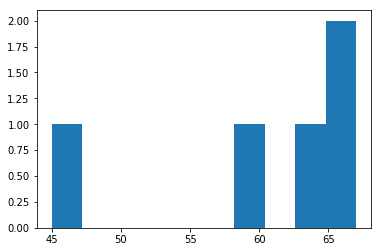

In [34]:
plt.hist(student_marks_df['English'])

(array([2., 1., 3., 2., 3.]),
 array([10. , 14.6, 19.2, 23.8, 28.4, 33. ]),
 <a list of 5 Patch objects>)

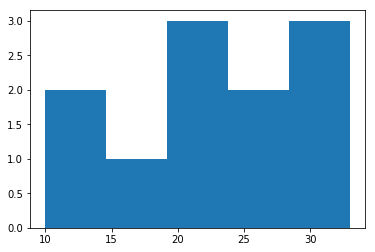

In [37]:
plt.hist([10,20,10,20,30,25,30,15,33,24,22],bins=5)


(array([9., 0., 1., 0., 1.]),
 array([10. , 23.6, 37.2, 50.8, 64.4, 78. ]),
 <a list of 5 Patch objects>)

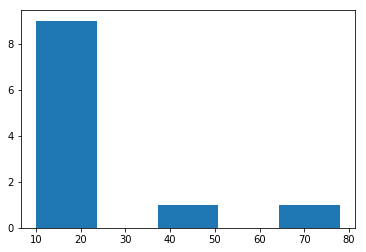

In [38]:
plt.hist([10,10,10,10,10,10,10,10,10,45,78],bins=5)

In [39]:
key = student_data_df.College.value_counts().index
key

Index(['SVEC', 'SVCE', 'SVECW', 'SVU'], dtype='object')

In [41]:
values = student_data_df.College.value_counts()
values

SVEC     2
SVCE     1
SVECW    1
SVU      1
Name: College, dtype: int64

<BarContainer object of 4 artists>

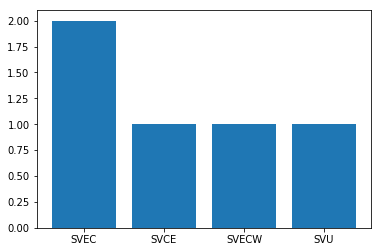

In [42]:
plt.bar(key,values)

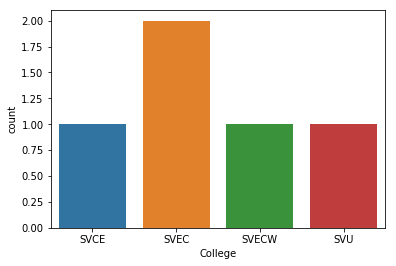

In [43]:
sns.countplot(student_data_df.College)

In [44]:
x = np.arange(2,10)
y = 3 *x +5

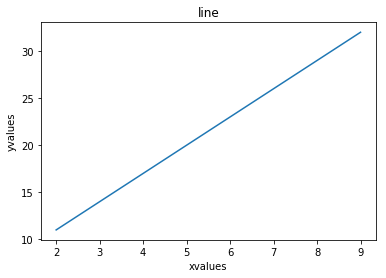

In [49]:
plt.title('line')
plt.xlabel('xvalues')
plt.ylabel('yvalues')
plt.plot(x,y)

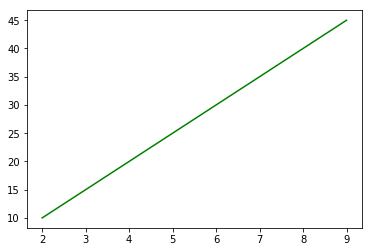

In [52]:
plt.plot(x,y,'r')
plt.plot(x,5*x,'g')

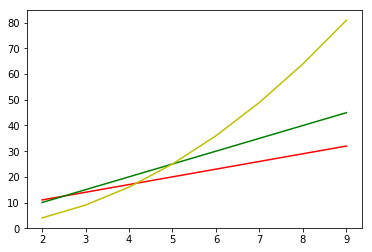

In [57]:
plt.plot(x,y,'r')
plt.plot(x,5*x,'g')
plt.plot(x,x*x,'y')

(array([1., 1., 1., 0., 1., 1., 0., 1., 1., 1.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <a list of 10 Patch objects>)

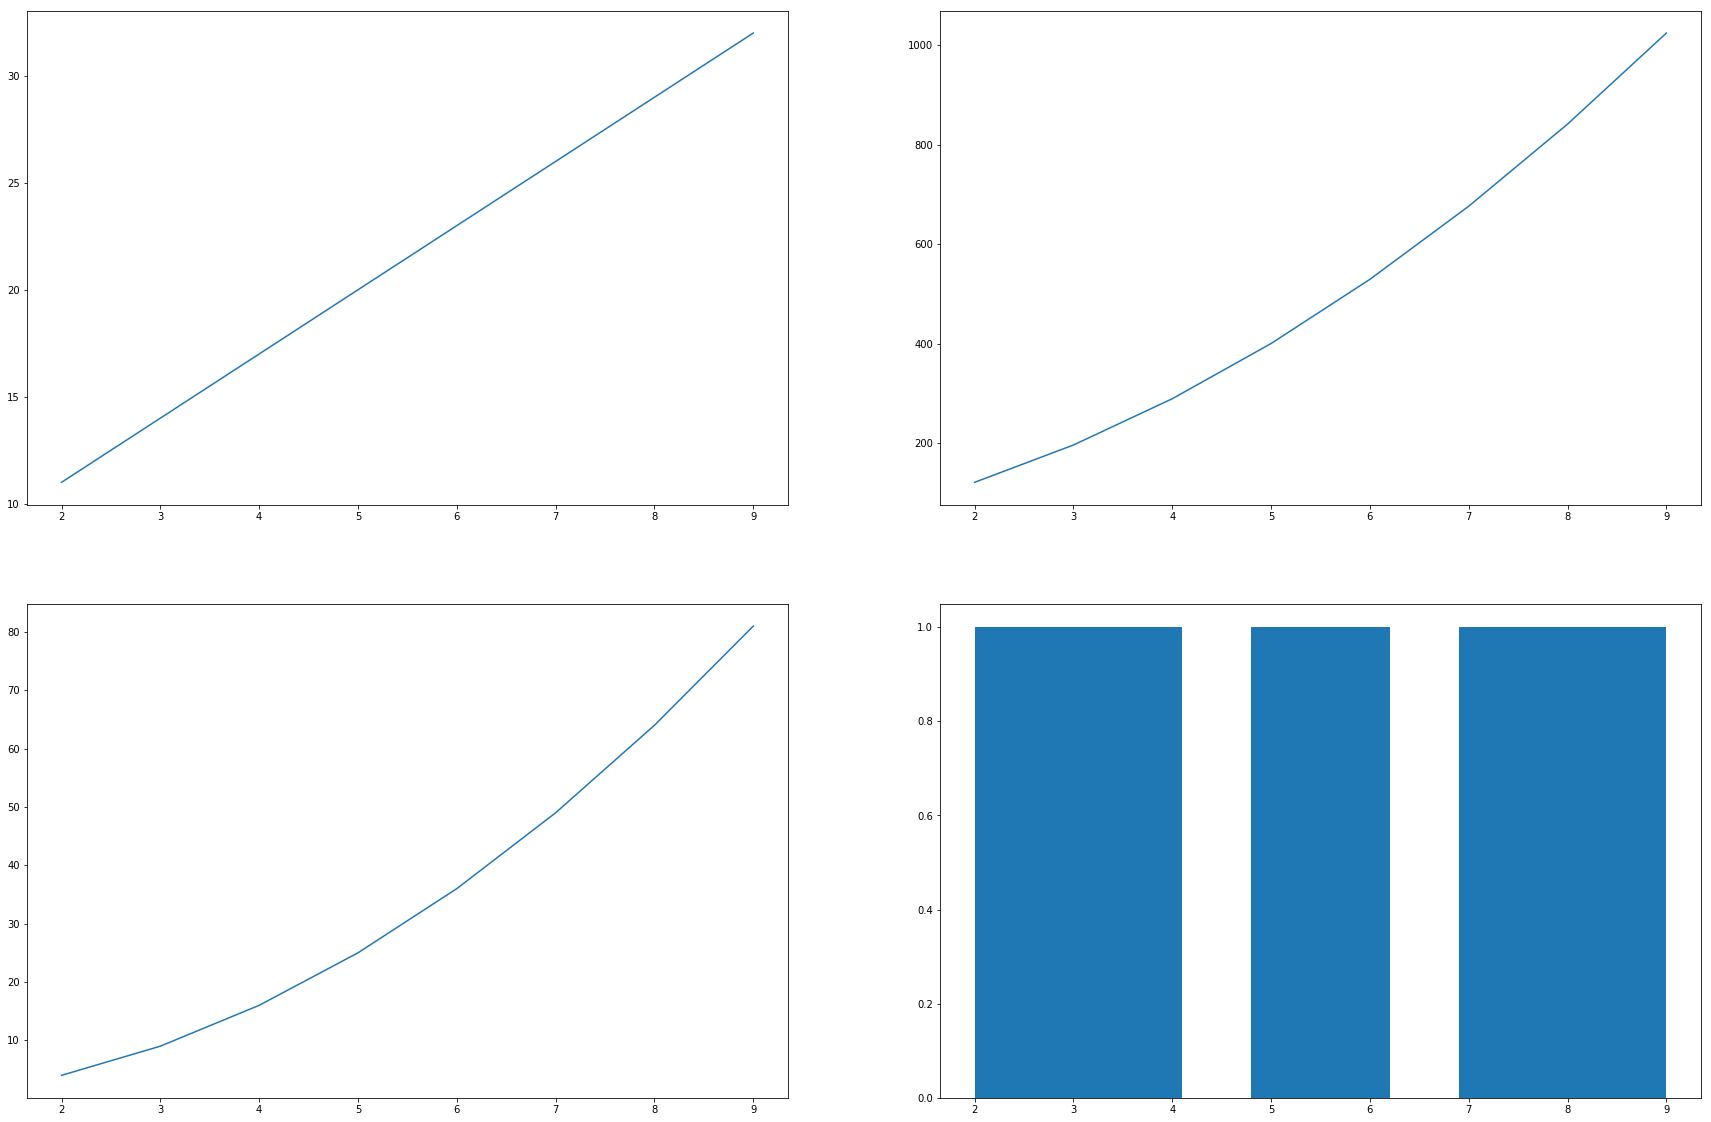

In [62]:
plt.figure(figsize =(30,20))
plt.subplot(2,2,1)
plt.plot(x,y)

plt.subplot(2,2,2)
plt.plot(x,y*y)

plt.subplot(2,2,3)
plt.plot(x,x*x)

plt.subplot(2,2,4)
plt.hist(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x2881b896748>,
 'caps': [<matplotlib.lines.Line2D at 0x2881b896f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x2881b896208>],
 'medians': [<matplotlib.lines.Line2D at 0x2881b89e828>],
 'fliers': [<matplotlib.lines.Line2D at 0x2881b89ec50>],
 'means': []}

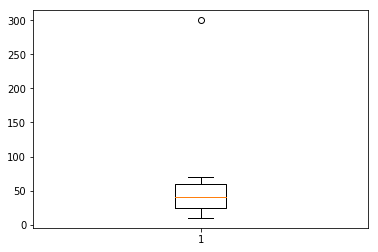

In [66]:
plt.boxplot([10,20,30,40,50,70,300])

##### q1,q2,q3
##### IQR = 1.5*(q3-q1)
##### (q1-IQR,q3+IQR)

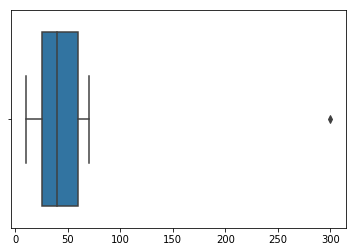

In [68]:
sns.boxplot([10,20,30,40,50,70,300])

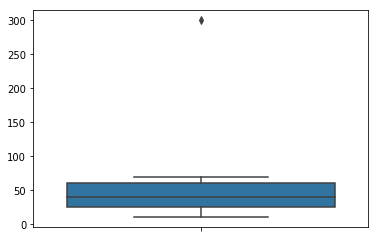

In [69]:
sns.boxplot(y=[10,20,30,40,50,70,300])

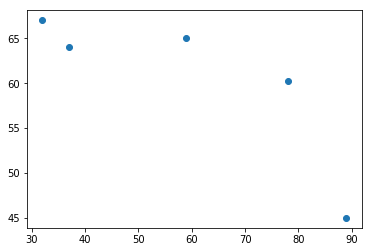

In [70]:
plt.scatter(student_marks_df['Maths'],\
           student_marks_df['English'])

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


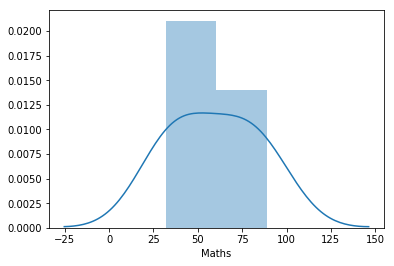

In [73]:
sns.distplot(student_marks_df['Maths'])

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


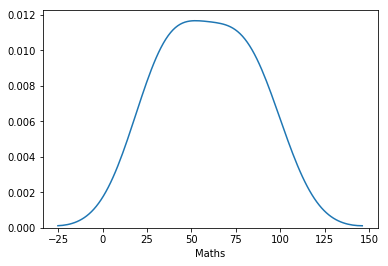

In [74]:
sns.distplot(student_marks_df['Maths'],hist=False)

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


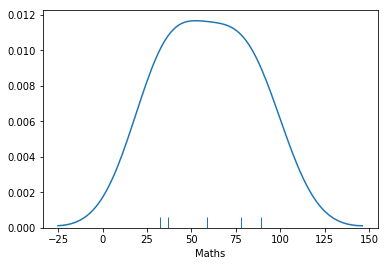

In [75]:
sns.distplot(student_marks_df['Maths'],hist=False,\
            rug=True)

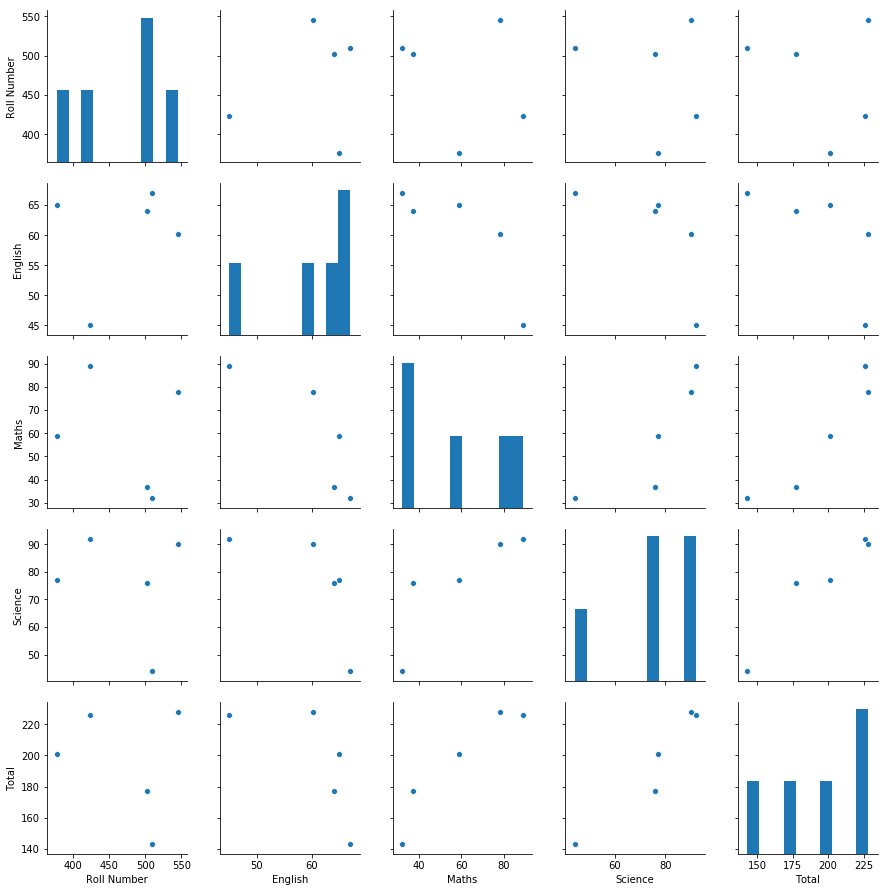

In [76]:
sns.pairplot(student_marks_df)

In [77]:
student_marks_df.corr()

,Roll Number,English,Maths,Science,Total
Roll Number,1.000000,0.271240,-0.257361,-0.202161,-0.219994
English,0.271240,1.000000,-0.818474,-0.667738,-0.678922
Maths,-0.257361,-0.818474,1.000000,0.842297,0.943591
Science,-0.202161,-0.667738,0.842297,1.000000,0.956024
Total,-0.219994,-0.678922,0.943591,0.956024,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002881D01A6A0>,
      dtype=object)

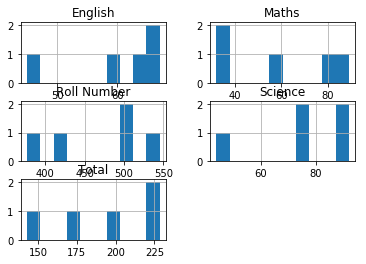

In [78]:
student_marks_df.hist()

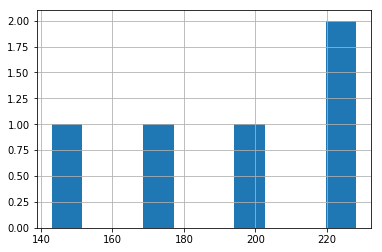

In [79]:
student_marks_df['Total'].hist()